## Task 2: Prediction using Decision Tree  Algorithm : ( INTERMEDIATE LEVEL TASK)


## By Viraj Deepak Pawar

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data 

In [2]:
# To read csv file containing the dataset

data = pd.read_csv('iris.csv')  

In [5]:
# To check dimensions of dataset

data.shape

(150, 6)

There 150 observations on 6 variables.

In [3]:
# To print first 5 rows

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To print bottom 5 rows

data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Columns in the dataset

data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Data Type of the columns

data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Species is a categorical variable.

In [8]:
# To check missing values

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values.

## Summary of Data

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Results:

1. There are total 150 observations in the dataset.
2. Average Sepal Length in cm = 5.843333
3. Average Sepal Width in cm = 3.054000
4. Average Petal Length in cm = 3.758667
5. Average Petal Width in cm = 1.198667
6. Maximum Sepal Length in cm = 7.900
7. Minimum Sepal Lenth in cm = 4.300
8. Maximum Sepal Width in cm = 4.400
9. Minimum Sepal Width in cm = 2.00
10. Maximum Petal Length in cm = 6.900
11. Minimum Petal Length in cm = 1.00
12. Maximum Petal Width in cm = 2.500
13. Minimum Petal Width in cm = 0.100

## Identify Outlier In Data

<AxesSubplot:>

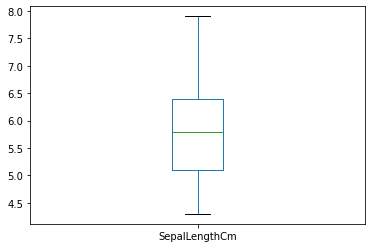

In [10]:
#Boxplot for 'SepalLengthCm'

data['SepalLengthCm'].plot.box()

<AxesSubplot:>

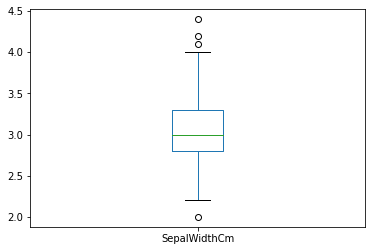

In [11]:
#Boxplot for 'SepalWidthCm'

data['SepalWidthCm'].plot.box()

<AxesSubplot:>

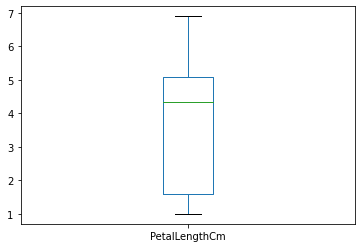

In [12]:
#Boxplot for 'PetalLengthCm'

data['PetalLengthCm'].plot.box()

<AxesSubplot:>

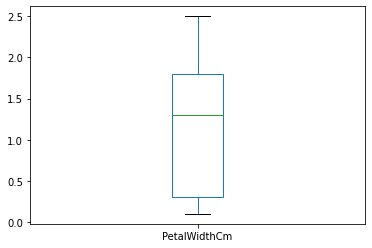

In [13]:
#Boxplot for 'PetalWidthCm'

data['PetalWidthCm'].plot.box()

There are no outliers in any column except in column SepalWidthCm.

Now, we have to treat the detected outliers. I will be using Flooring and Cappping method to do so.

In this quantile-based technique, we will do the flooring(eg. 25th percentile) for the lower values and capping(eg. for the 75th percentile) for the higher values.
These percentile values will be used for the quantile-based flooring and capping.
The codes given below will remove the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the 'SepalWidthCm' variable.

## treating outliers found in SepalWidthCm column using Flooring and Capping method

In [72]:

Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)

IQR = Q3 - Q1

whisker_width = 1.5

lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

data['SepalWidthCm']=np.where(data['SepalWidthCm']>upper_whisker,upper_whisker,np.where(data['SepalWidthCm']<lower_whisker,lower_whisker,data['SepalWidthCm']))

## Confirming that there are no more outliers in 'SepalWidthCm' using Boxplot

<AxesSubplot:>

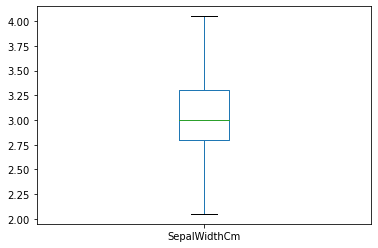

In [73]:
data['SepalWidthCm'].plot.box()

### Species is a categorical variable. So, now we have to deal with it.

In [14]:
data['Species'].replace('Iris-setosa', 0,inplace=True)
data['Species'].replace('Iris-versicolor', 1,inplace=True)
data['Species'].replace('Iris-virginica', 2,inplace=True)

In [15]:
# To print first 5 rows

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
# To print last 5 rows

data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


## Defining X: Independent Variable and Y:Dependent Variable

In [18]:
x = data.drop(['Species','Id'],axis=1)
y = data['Species']

In [19]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### To perform further we have split data into two parts. i) train dataset and ii) test dataset.
   
### 'train' dataset used to train and build model. 'test' dataset used to predict

In [21]:
#importing required libraries

from sklearn.model_selection import train_test_split

In [22]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 101, stratify = y)

In [23]:
train_y.value_counts()/len(train_y)

2    0.339286
0    0.330357
1    0.330357
Name: Species, dtype: float64

In [24]:
test_y.value_counts()/len(test_y)

0    0.342105
1    0.342105
2    0.315789
Name: Species, dtype: float64

### DecisonTree Classifier

In [25]:
#importing required libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()

In [26]:
#fitting data

decision_tree=clf.fit(x,y)
print(decision_tree)

DecisionTreeClassifier()


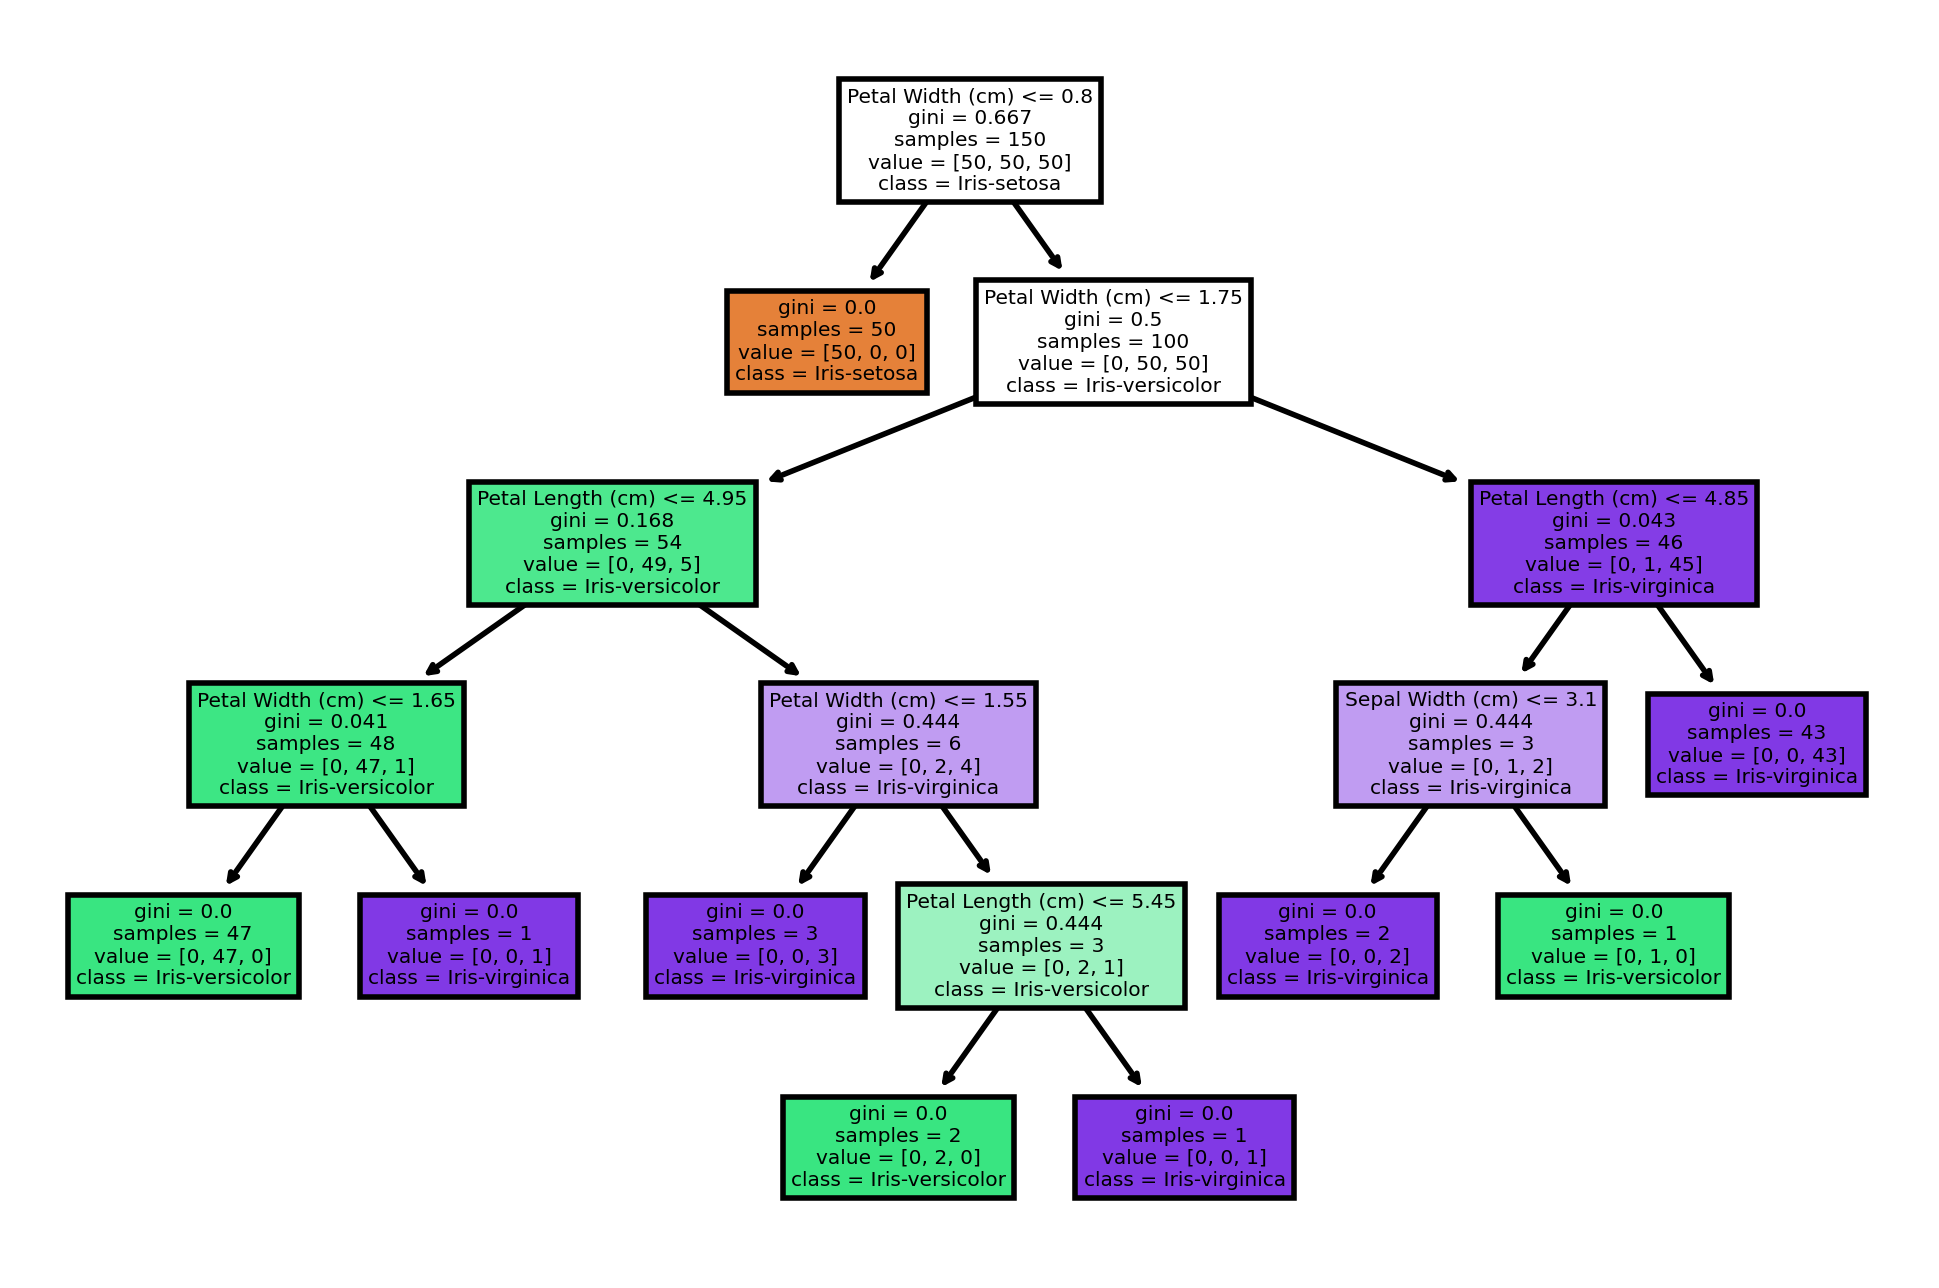

In [56]:
#loading the tree

features = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, dpi = 400)

tree.plot_tree(clf.fit(x,y), feature_names = features, class_names = class_names, filled = True);

In [51]:
#fitting data on Training Datset

clf.fit(train_x,train_y)
clf.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier()>

In [52]:
#checking for the score for Training Datset 

clf.score(train_x, train_y)

1.0

In [53]:
#checking for the score for Testing Datset 

clf.score(test_x, test_y)

0.9210526315789473

In [54]:
#making predictions for Training Dataset

clf.predict(train_x)

array([2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 1], dtype=int64)

In [55]:
#making predictions for Testing Dataset

clf.predict(test_x)

array([1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1], dtype=int64)

####  We find that the accuracy of the model is very good.